Problem Statement: A 3.5 kg mass is attached to a spring on a horizontal table. The mass was pulled ro some initial displcement (A) and released. Using the timem and displacemnt measurments file, find the initial isplacement A, the spring constant K, and the damping coeficient c.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Initial Displacement (A): 5.478262810895716
Damping Coefficient (c): 0.6943531166925002
Spring Constant (k): 22.45463263780546


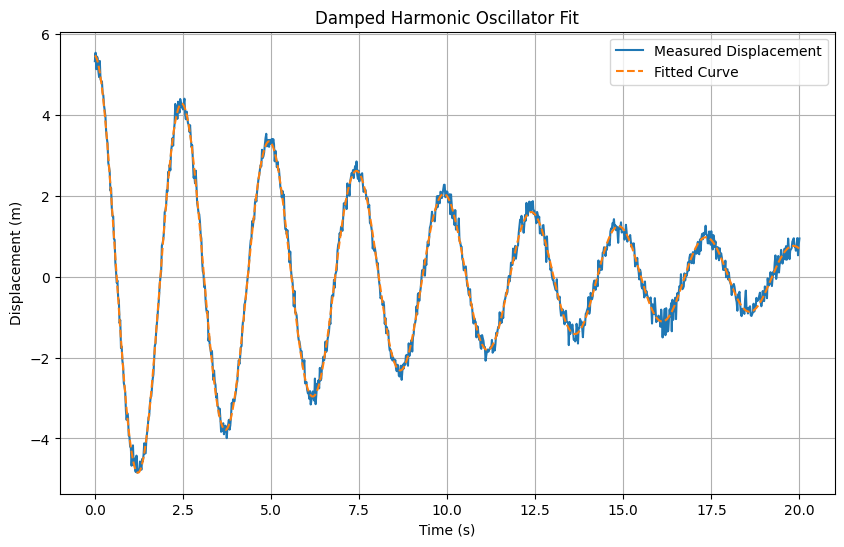

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/projects/mass_spring_data.csv')
time = data['Time (s)'].values  # Replace 'time' with the actual column name in your CSV
displacement = data['Displacement (m)'].values  # Replace 'displacement' with the actual column name

# Define the model for damped harmonic oscillator
def damped_oscillator(t, A, gamma, omega_d, phi):
    return A * np.exp(-gamma * t) * np.cos(omega_d * t + phi)

# Initial guesses for the parameters
A_initial = np.max(displacement)  # Initial guess for A
gamma_initial = 0.1  # A small initial guess for damping coefficient
omega_d_initial = 2 * np.pi / (time[-1] - time[0])  # Approximate angular frequency
phi_initial = 0  # Phase shift, which can be ignored

# Fit the model to the data
params, params_covariance = curve_fit(damped_oscillator, time, displacement,
                                      p0=[A_initial, gamma_initial, omega_d_initial, phi_initial])

# Extract the fitted parameters
A_fit, gamma_fit, omega_d_fit, phi_fit = params

#print(omega_d_fit)

# Given mass of the object
mass = 3.5 #kg

# Calculate the spring constant (k) and damping coefficient (c)
k_fit = mass * omega_d_fit**2  # k = m * omega_d^2
c_fit = 2 * gamma_fit * mass  # c = 2 * gamma * m

# Print the results
print(f"Initial Displacement (A): {A_fit}")
print(f"Damping Coefficient (c): {c_fit}")
print(f"Spring Constant (k): {k_fit}")

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(time, displacement, label='Measured Displacement')
plt.plot(time, damped_oscillator(time, *params), label='Fitted Curve', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.title('Damped Harmonic Oscillator Fit')
plt.grid(True)
plt.show()